In [38]:
import numpy as np
import pandas as pd
import math
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM,GRU,Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1) 
random.seed(1)

# read data from files to dataframes
df1 = pd.read_csv("./Traffic_Data_cali/train.csv", encoding='utf-8')
df2 = pd.read_csv("./Traffic_Data_cali/test.csv", encoding='utf-8')

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df1['Flow (Veh/5 Minutes)'].values.reshape(-1, 1))
train_data = scaler.transform(df1['Flow (Veh/5 Minutes)'].values.reshape(-1, 1)).reshape(1, -1)[0]
test_data = scaler.transform(df2['Flow (Veh/5 Minutes)'].values.reshape(-1, 1)).reshape(1, -1)[0]

# practicing with different time lag (look back) values to optimize the models
lag = 12
train, test = [], []
for i in range(lag, len(train_data)):
    train.append(train_data[i - lag: i + 1])
for i in range(lag, len(test_data)):
    test.append(test_data[i - lag: i + 1])

train = np.array(train)
test = np.array(test)
# shuffle data (stateles case)
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = test[:, :-1]
y_test = test[:, -1]

In [40]:
# building models

def build_LSTM():
    model = Sequential()
    model.add(LSTM(64,input_shape=(lag, 1),return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model    

def build_GRU():
    model = Sequential()
    model.add(GRU(64, input_shape=(lag, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

#model_struct = "LSTM"
model_struct = "GRU"
#model_struct = "AE"
# train the models 
if model_struct == "GRU" :
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    model = build_GRU()
    model.summary()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    monitor = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='auto',restore_best_weights=True)
    hist = model.fit(x_train, y_train,batch_size=64,epochs=600,callbacks=[monitor],validation_split=0.05)
    model.save('./models/LSTM.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('./models/LSTM_loss.csv', encoding='utf-8', index=False)        
elif model_struct == "GRU" :        
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    model = build_GRU()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    monitor = EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='auto',restore_best_weights=True)
    hist = model.fit(x_train, y_train,batch_size=64,epochs=600,callbacks=[monitor],validation_split=0.05)
    model.save('./models/GRU.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('./models/GRU_loss.csv', encoding='utf-8', index=False)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
116/116 [==============================] - 8s 27ms/step - loss: 0.0107 - mape: 100916.9297 - val_loss: 0.0042 - val_mape: 110976.9453
Epoch 2/600
116/116 [===============

Epoch 51/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 23387.4258 - val_loss: 0.0025 - val_mape: 84659.8438
Epoch 52/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 18825.6289 - val_loss: 0.0025 - val_mape: 34484.5469
Epoch 53/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 23123.2246 - val_loss: 0.0024 - val_mape: 58731.4023
Epoch 54/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 17529.8945 - val_loss: 0.0024 - val_mape: 64343.8242
Epoch 55/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 22972.7930 - val_loss: 0.0024 - val_mape: 69338.8984
Epoch 56/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 16903.7656 - val_loss: 0.0024 - val_mape: 55919.1914
Epoch 57/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0026 - mape: 21091.3086 - val_loss: 0.0025 - val_ma

116/116 [==============================] - 2s 15ms/step - loss: 0.0024 - mape: 17162.1406 - val_loss: 0.0027 - val_mape: 66815.1875
Epoch 108/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0024 - mape: 18519.4355 - val_loss: 0.0022 - val_mape: 50455.3711
Epoch 109/600
116/116 [==============================] - 2s 15ms/step - loss: 0.0023 - mape: 26130.3066 - val_loss: 0.0023 - val_mape: 64233.5664
Epoch 110/600
116/116 [==============================] - 2s 19ms/step - loss: 0.0024 - mape: 22621.8828 - val_loss: 0.0021 - val_mape: 80087.0156
Epoch 111/600
116/116 [==============================] - 3s 23ms/step - loss: 0.0023 - mape: 21262.4746 - val_loss: 0.0021 - val_mape: 57508.3750
Epoch 112/600
116/116 [==============================] - 2s 20ms/step - loss: 0.0024 - mape: 21196.0664 - val_loss: 0.0022 - val_mape: 49526.4492
Epoch 113/600
116/116 [==============================] - 2s 16ms/step - loss: 0.0023 - mape: 21577.5449 - val_loss: 0.0021 - val_mape: 609

116/116 [==============================] - 3s 23ms/step - loss: 0.0023 - mape: 24046.3164 - val_loss: 0.0020 - val_mape: 63499.3359
Epoch 164/600
116/116 [==============================] - 3s 23ms/step - loss: 0.0022 - mape: 19969.3750 - val_loss: 0.0021 - val_mape: 58615.3828
Epoch 165/600
116/116 [==============================] - 3s 23ms/step - loss: 0.0022 - mape: 17166.6895 - val_loss: 0.0024 - val_mape: 59665.5742
Epoch 166/600
116/116 [==============================] - 3s 24ms/step - loss: 0.0022 - mape: 22171.7344 - val_loss: 0.0021 - val_mape: 75164.2500
Epoch 167/600
116/116 [==============================] - 3s 23ms/step - loss: 0.0022 - mape: 16325.8721 - val_loss: 0.0021 - val_mape: 57273.3359
Epoch 168/600
116/116 [==============================] - 2s 16ms/step - loss: 0.0023 - mape: 18248.6699 - val_loss: 0.0021 - val_mape: 86383.7109
Epoch 169/600
116/116 [==============================] - 3s 25ms/step - loss: 0.0022 - mape: 21404.8945 - val_loss: 0.0021 - val_mape: 699

In [34]:
# evaluate models and plot graphs 

# calculate Mean Absolute Percentage Error
def evaluate_models(y_true, y_pred):
    # the zero values we have in the dataset is a result to the sensors not reporting the data 
    # for that time for example server error or other types of errors we drop those values 
    # so they dont have false impact on the result 
    y_true = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]
      
    # calculate the Mean Absolute Percentage Error 
    sums = 0 # initialize value
    for i in range(len(y_pred)):
        tmp = abs(y_true[i] - y_pred[i]) / y_true[i]
        sums += tmp
    mape = sums * (100 / len(y_pred))
    # calculate variance score     
    ac=metrics.accuracy_score(y_true, y_pred)
    print(ac)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)
    
def plot_LSTM_oneDay(y_true, y_pred):
    d = '2020-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(['LSTM'], y_preds):
        ax.plot(x, y_pred[: 288], label=name)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flow')
    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.savefig('./graphs/LSTM_oneDay.png')
    plt.show()    
def plot_GRU_oneDay(y_true, y_pred):
    d = '2020-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(['GRU'], y_preds):
        ax.plot(x, y_pred[: 288], label=name)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flow')
    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.savefig('./graphs/GRU_oneDay.png')
    plt.show()    
def plot_models_oneDay(y_true, y_pred):
    d = '2020-3-4 00:00'
    x = pd.date_range(d, periods=288, freq='5min')
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(['LSTM', 'GRU'], y_preds):
        ax.plot(x, y_pred[: 288], label=name)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flow')
    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.savefig('./graphs/models_oneDay.png')
    plt.show()
def plot_models_oneWeek(y_true, y_pred):
    x = pd.date_range(start ='2020-3-4 00:00',end ='2020-3-11 00:00', freq ='5min')  
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(['LSTM', 'GRU'], y_preds):
        ax.plot(x, y_pred[: 2017], label=name)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flow')
    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    fig.savefig('./graphs/models_oneWeek.png')
    plt.show()    

In [35]:
lstm = load_model('./models/LSTM.h5')
gru = load_model('./models/GRU.h5')

In [36]:
models = [lstm, gru]
names = ['LSTM', 'GRU']
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]
y_preds = []
for name, model in zip(names, models):
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    file = './images/' + name + '.png'
    plot_model(model, to_file=file, show_shapes=True)  
    predicted = model.predict(x_test)
    predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
    y_preds.append(predicted)
    print(name)
    evaluate_models(y_test, predicted)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
LSTM


ValueError: continuous is not supported

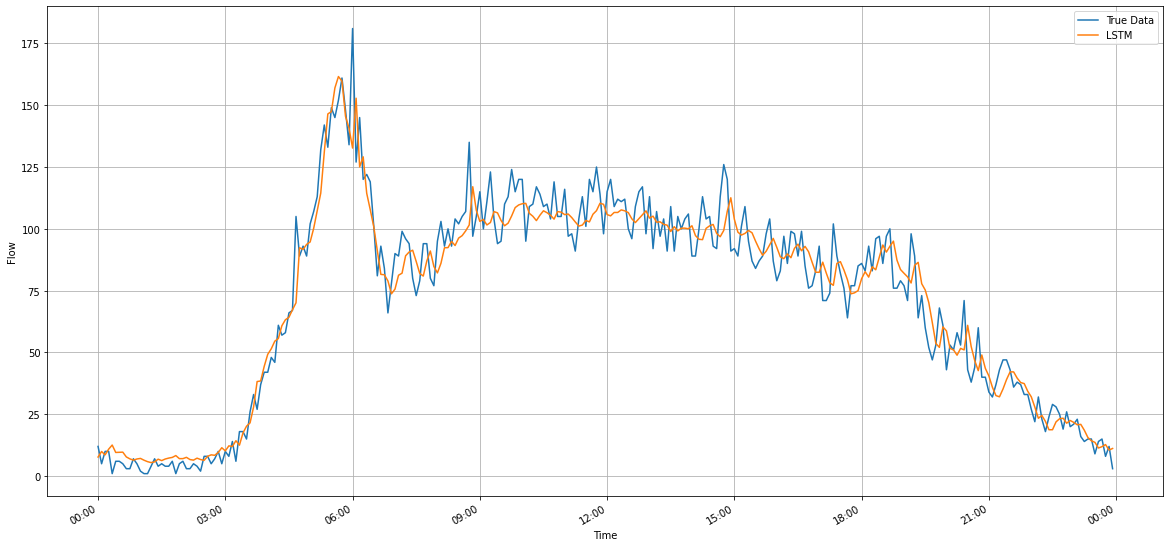

In [8]:
plot_LSTM_oneDay(y_test[: 288],y_preds[: 288])  

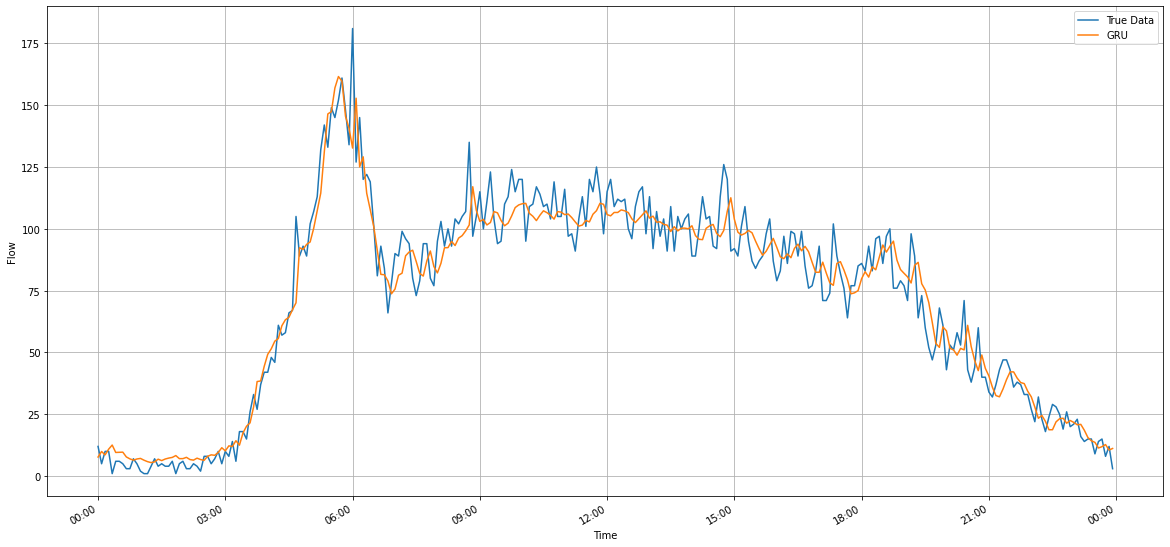

In [9]:
plot_GRU_oneDay(y_test[: 288],y_preds[: 288])  

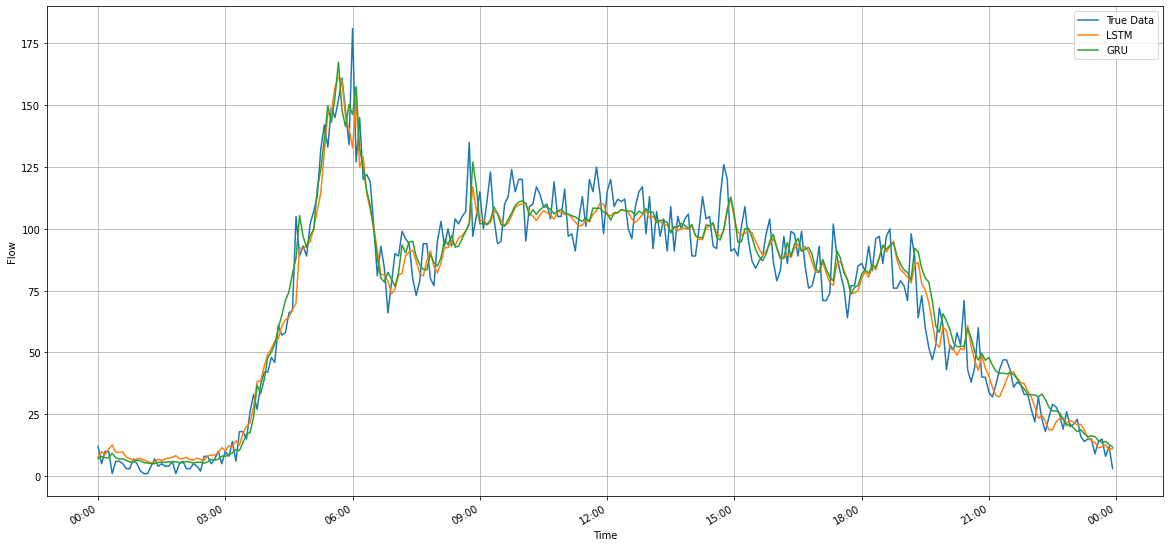

In [10]:
plot_models_oneDay(y_test[: 288],y_preds[: 288])  

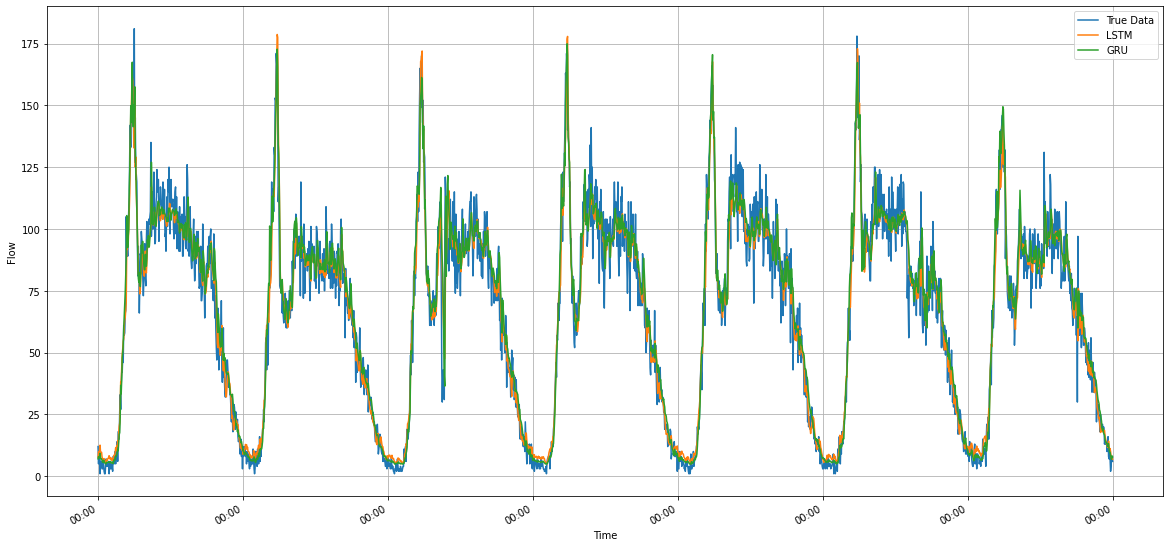

In [11]:
plot_models_oneWeek(y_test[: 2017],y_preds[: 2017])  

In [12]:
x=df2.loc[df2['5 Minutes'] =="11/3/2020 11:30"] 
true = x["Flow (Veh/5 Minutes)"].values
true[0]

106

In [13]:
predicted[1578]

104.7228

In [14]:
#1578.shape

In [15]:
predicted[1578].astype(int)

104

In [17]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fac0ab94e80>>